# Detecting Insults in Social Commentary

## 1. Business Understanding

### 1.1 Project description
Analyzing data related to insults found in social commentary to provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions.

Predict whether a comment posted during a public discussion is considered insulting to one of the participants.

### 1.2 Project objectives
- To provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions.
- To classify into insults and not insults
- To conduct a basic frequency analysis to identify the most common insults used in social commentary. This can help pinpoint which insults are more prevalent.

## 2. Data Understanding

### 2.1. Importing and exploring the data


In [1]:
# imports

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np


In [2]:
df = pd.concat([pd.read_csv('../data/train.csv'),pd.read_csv('../data/test_with_solutions.csv')]).drop(columns=["Date", "Usage"])

df.head(20)

,Insult,Comment
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,"""Yeah and where are you now?"""
7,1,"""shut the fuck up. you and the rest of your fa..."
8,1,"""Either you are fake or extremely stupid...may..."
9,1,"""That you are an idiot who understands neither..."


### 2.2.1 Columns description

- insults: two possible outputs (0, 1). 0 means no insults, 1 means it contains insults (based on the presence of insult words, not accurate)
- date: the date of the comment
- comment: the comment being analyzed

Insult
0    4852
1    1742
Name: count, dtype: int64


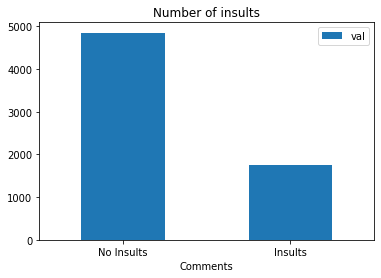

In [3]:
# from Insults, show me how many 1 and 0 i have
num = df['Insult'].value_counts()

print(num)

plot = pd.DataFrame({'Comments':['No Insults', 'Insults'], 'val':[num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults',x='Comments', y='val', rot=0)


### 3.2. Data visualization

#### Visualise the data in a wordcloud

In [4]:
# df.dropna(inplace=True)
df_clean = df[df['Insult'] != 0]
df_clean.head(20)
df_clean.shape


(1742, 2)

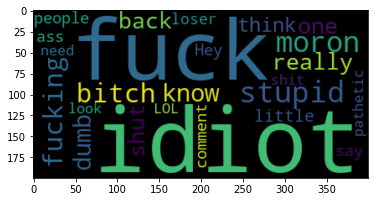

In [5]:
text = df_clean['Comment'].to_string(index=False)
processed_text = re.sub(r'\bxa0\b', '', text)

wordcloud = WordCloud(max_words=25, min_word_length=3, ).generate(processed_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

## 3. Data preparation and pre-processing

### 3.1. Data cleaning

In [6]:
# Download the required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

df['Comment'] = df['Comment'].apply(clean_text)

df.head(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yahbo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Insult,Comment
0,1,You fuck your dad
1,0,i really dont understand your pointxa It seems...
2,0,Axcxamajority of Canadians can and has been wr...
3,0,listen if you dont wanna get married to a man ...
4,0,Cxec buean xuuedng uubueddng biuecu txecnh cx...
5,0,SDL OK but I would hope theyd sign him to a on...
6,0,Yeah and where are you now
7,1,shut the fuck up you and the rest of your fagg...
8,1,Either you are fake or extremely stupidmaybe both
9,1,That you are an idiot who understands neither ...


### 3.2 Data splitting

In [7]:
train, test = train_test_split(df, test_size=0.3)

### 3.4 Data transformation and feature selection

In [8]:


tfidf_w = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', use_idf=False, max_features=50000)
tfidf_c = TfidfVectorizer(ngram_range=(3, 10), analyzer='char', use_idf=False, max_features=100000)

ptrain_data_w = tfidf_w.fit_transform(train["Comment"])
ptrain_data_c = tfidf_c.fit_transform(train["Comment"])

ptest_data_w = tfidf_w.transform(test["Comment"])
ptest_data_c = tfidf_c.transform(test['Comment'])


## 4. Modeling
### 4.1. Logestic regression

In [9]:
insult_lr_w = LogisticRegression()
insult_lr_w.fit(ptrain_data_w, train["Insult"])

insult_lr_c = LogisticRegression()
insult_lr_c.fit(ptrain_data_c, train["Insult"])

predicted_lr_w = insult_lr_w.predict(ptest_data_w)
predicted_lr_c = insult_lr_c.predict(ptest_data_c)

print('Logistic Regression (Word Gram):', np.mean(predicted_lr_w == test["Insult"]))
print('Logistic Regression (Character Gram):', np.mean(predicted_lr_c == test["Insult"]))



Logistic Regression (Word Gram): 0.8292066700353714
Logistic Regression (Character Gram): 0.8453764527539162


## Feature importance plot:

The Feature Importance Plot generated from the logistic regression model displays the relative importance of different features in predicting insults vs. non-insults.

- X-axis: Represents the magnitude of importance or influence that each feature has on the model's predictions.
- Y-axis: Lists the names or labels of the features sorted by their importance, from least to most influential.

Each horizontal bar in the plot represents a feature, and its length illustrates the magnitude of its importance. Longer bars indicate features that have a more substantial impact on the model's predictions. This visualization helps identify which specific features are the most influential in determining whether a comment is classified as an insult or not, based on the logistic regression model's coefficients.

# Word based TF-IDF

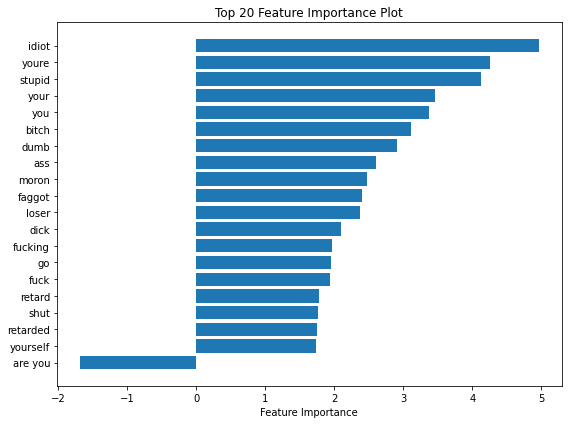

In [10]:
feature_importance = insult_lr_w.coef_[0]

actual_feature_names = tfidf_w.get_feature_names_out()

# Sort feature importance and corresponding names
sorted_idx = np.argsort(np.abs(feature_importance))
sorted_feature_importance = feature_importance[sorted_idx]
sorted_actual_feature_names = np.array(actual_feature_names)[sorted_idx]

# Get the indices of top N features based on their importance
top_n = 20  # Number of top features to display
top_indices = sorted_idx[-top_n:]
top_feature_importance = sorted_feature_importance[-top_n:]
top_feature_names = sorted_actual_feature_names[-top_n:]

# Plotting top N feature importance
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
plt.yticks(range(len(top_feature_importance)), top_feature_names)

# Rotate Y-axis labels for better readability
plt.tick_params(axis='y', rotation=0)

plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importance Plot')
plt.tight_layout()
plt.show()

# Character based TF-IDF

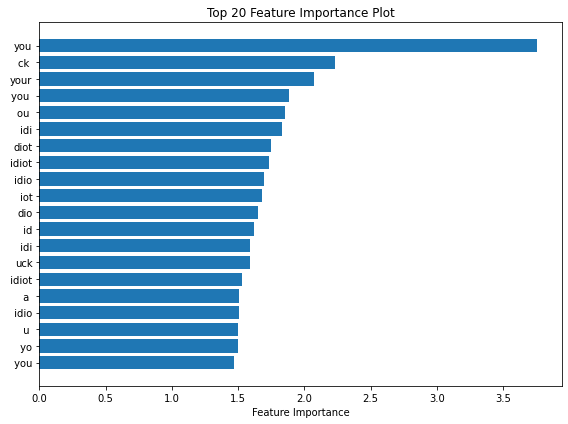

In [11]:
feature_importance = insult_lr_c.coef_[0]

actual_feature_names = tfidf_c.get_feature_names_out()

# Sort feature importance and corresponding names
sorted_idx = np.argsort(np.abs(feature_importance))
sorted_feature_importance = feature_importance[sorted_idx]
sorted_actual_feature_names = np.array(actual_feature_names)[sorted_idx]

# Get the indices of top N features based on their importance
top_n = 20  # Number of top features to display
top_indices = sorted_idx[-top_n:]
top_feature_importance = sorted_feature_importance[-top_n:]
top_feature_names = sorted_actual_feature_names[-top_n:]

# Plotting top N feature importance
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.barh(range(len(top_feature_importance)), top_feature_importance, align='center')
plt.yticks(range(len(top_feature_importance)), top_feature_names)

# Rotate Y-axis labels for better readability
plt.tick_params(axis='y', rotation=0)

plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importance Plot')
plt.tight_layout()
plt.show()

# Model testing (Manual)

In [12]:
data_input = np.array(["Adolf Husein Hitler is a zionist"])

output_data = tfidf_w.transform(data_input)

output_data_pred = insult_lr_w.predict(output_data)
print(output_data_pred)


[0]


## 4.2. K-Neighbors Model

In [13]:
knn_w_classifier = KNeighborsClassifier(n_neighbors=10)
knn_c_classifier = KNeighborsClassifier(n_neighbors=10)

knn_w_classifier.fit(ptrain_data_w, train["Insult"])
knn_c_classifier.fit(ptrain_data_c, train["Insult"])


KNeighborsClassifier(n_neighbors=10)

In [14]:
predicted_knn_w = knn_w_classifier.predict(ptest_data_w)
predicted_knn_c = knn_c_classifier.predict(ptest_data_c)

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\Program Files\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "c:\Program Files\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Program Files\Python310\lib\subprocess.py", line 1494, in _readerthread
    buffer.append(fh.read())
  File "c:\Program Files\Python310\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
c:\Program Files\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you wa

In [15]:
print('K-Neighbors (Word Gram):', np.mean(predicted_knn_w == test["Insult"]))
print('K-Neighbors (Char Gram):', np.mean(predicted_knn_c == test["Insult"]))

K-Neighbors (Word Gram): 0.7448206164729662
K-Neighbors (Char Gram): 0.8024254674077818


## 4.3. RoBERTa Model

# [Click here to open the RoBERTa notebook](./Roberta.ipynb)


## 5. Interpretation